In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

C:\Users\175045\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
lg = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=9,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)

In [9]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [12]:
mnist.feature_names, mnist.target_names

(['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'pixel53',
  'pixel54',
  'pixel55',
  'pixel56',
  'pixel57',
  'pixel58',
  'pixel59',
  'pixel60',
  'pixel61',
  'pixel62',
  'pixel63',
  'pixel64',
  'pixel65',
  'pixel66',
  'pixel67',
  'pixel68',
  'pixel69',
  'pixel70',
  'pixel71',
  'pixel72',
  'pixel73',
  'pixel74',
  'pixel75',
  'pixel76',
  'pixel77',
  'pixel

In [13]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [21]:
xtrain = mnist.data[:6000]

In [22]:
ytrain = mnist.target[:6000]

In [23]:
xtest = mnist.data[6000:7500]
ytest = mnist.target[6000:7500]

In [26]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((6000, 784), (1500, 784), (6000,), (1500,))

In [27]:
ytest

array(['6', '0', '1', ..., '3', '5', '0'], dtype=object)

In [28]:
ytrain

array(['5', '0', '4', ..., '8', '6', '9'], dtype=object)

In [29]:
lg.fit(xtrain,ytrain)

C:\Users\175045\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
ypredict = lg.predict(xtest)

In [31]:
from sklearn.metrics import confusion_matrix

In [33]:
conM = confusion_matrix(
    ytest,
    ypredict,
    labels=None,
    sample_weight=None,
    normalize=None,
)

In [34]:
conM

array([[139,   0,   2,   1,   0,   2,   4,   0,   5,   0],
       [  0, 162,   2,   1,   1,   1,   0,   0,   3,   1],
       [  1,   0, 124,   4,   1,   2,   2,   1,   8,   3],
       [  3,   1,   0, 125,   0,  12,   0,   2,  10,   1],
       [  0,   2,   0,   1, 123,   1,   0,   1,   1,   6],
       [  1,   2,   1,   4,   3, 127,   4,   2,   5,   0],
       [  0,   0,   3,   1,   0,   2, 135,   0,   1,   1],
       [  0,   0,   2,   6,   3,   2,   0, 124,   2,  15],
       [  2,   2,   4,   6,   2,   6,   3,   0, 119,   6],
       [  0,   2,   1,   2,   2,   0,   0,   4,   3, 131]], dtype=int64)

In [64]:
conM.shape

(10, 10)

In [35]:
from sklearn.metrics import precision_score, recall_score

In [45]:
pr = precision_score(
    ytest,
    ypredict,
    labels=None,
    pos_label=1,
    average='micro',
    sample_weight=None,
    zero_division='warn',
)
re = recall_score(
    ytest,
    ypredict,
    labels=None,
    pos_label=1,
    average='micro',
    sample_weight=None,
    zero_division='warn',
)

In [46]:
pr, re

(0.8726666666666667, 0.8726666666666667)

In [47]:
from sklearn.metrics import precision_recall_curve

In [49]:
# precision, recall, threshold = precision_recall_curve(
#     ytest,
#     ypredict,
#     pos_label=None,
#     sample_weight=None,
# )

In [53]:
from matplotlib import pyplot as plt

In [62]:
thresholds = 0.5

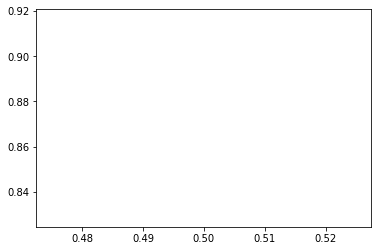

In [63]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions,  label="Precision")
    plt.plot(thresholds, recalls,  label="Recall")

plot_precision_recall_vs_threshold(pr, re, thresholds)
plt.show()